<a href="https://colab.research.google.com/github/pvanand07/Udacity-nd-intro-to-ml/blob/master/Project-1-Predict-Bike-Sharing-Demand-AutoGluon/Bike_Sharing_Demand_AutoGluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached setuptools-67.8.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 38.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=f2511e9d31bb19c94cb7104860bf29709c39e790fc0c5038f4f20eb3626ef7b6
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behav

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "anandsiva"
kaggle_key = "71c7ff9b391e9a0fba38ae4c7f4b1a6c"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand --force
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 50.0MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.metrics import r2_score, accuracy_score

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.DataFrame(pd.read_csv("train.csv", parse_dates=["datetime"])).drop(["casual","registered"], axis=1)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.DataFrame(pd.read_csv("test.csv", parse_dates=["datetime"]))
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [ ]:
# Same thing as train and test dataset
submission = test[["datetime"]].copy()
submission.head()

,datetime
0,2011-01-20 00:00:00
1,2011-01-20 01:00:00
2,2011-01-20 02:00:00
3,2011-01-20 03:00:00
4,2011-01-20 04:00:00


In [ ]:
from sklearn.model_selection import train_test_split
train_data,val_data = train_test_split(train,test_size=0.2,random_state=0)  
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label ='count',eval_metric='root_mean_squared_error').fit(train_data, presets="best_quality", time_limit = 600)

No path specified. Models will be saved in: "AutogluonModels/ag-20230530_094940/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230530_094940/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    8708
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 190.85554, 180.85226)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -75.749181      18.228514  545.898029                0.000959           0.220630            3       True         12
1          LightGBM_BAG_L2  -75.839626      15.031733  463.277328                0.249126          55.058908            2       True         11
2        LightGBMXT_BAG_L2  -79.979880      17.978428  490.618490                3.195822          82.400070            2       True         10
3    KNeighborsDist_BAG_L1  -94.488129       0.053843    0.024659                0.053843           0.024659            1       True          2
4      WeightedEnsemble_L2  -94.488129       0.055413    0.549316                0.001570           0.524657            2       True          9
5    KNeighborsUnif_BAG_L1 -112.769894       0.051637    0.022691         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -112.76989371124893,
  'KNeighborsDist_BAG_L1': -94.48812854475563,
  'LightGBMXT_BAG_L1': -133.13111209691883,
  'LightGBM_BAG_L1': -133.27724768144387,
  'RandomForestMSE_BAG_L1': -120.80128998719539,
  'CatBoost_BAG_L1': -133.06090463904943,
  'ExtraTreesMSE_BAG_L1': -127.10116127477657,
  'N

<Axes: xlabel='model'>

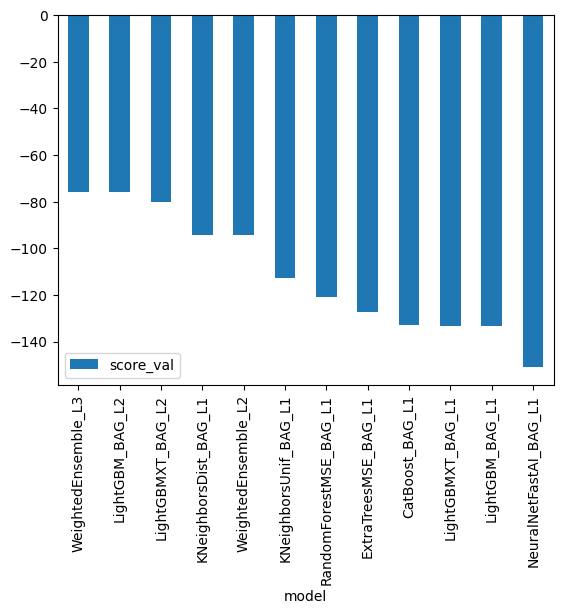

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictor.leaderboard(val_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-76.270261,-75.749181,29.661689,18.228514,545.898029,0.008377,0.000959,0.220630,3,True,12
1,LightGBM_BAG_L2,-76.646646,-75.839626,25.121445,15.031733,463.277328,0.442739,0.249126,55.058908,2,True,11
2,LightGBMXT_BAG_L2,-77.348617,-79.979880,29.210573,17.978428,490.618490,4.531866,3.195822,82.400070,2,True,10
3,KNeighborsDist_BAG_L1,-97.583924,-94.488129,0.073059,0.053843,0.024659,0.073059,0.053843,0.024659,1,True,2
4,WeightedEnsemble_L2,-97.583924,-94.488129,0.076403,0.055413,0.549316,0.003345,0.001570,0.524657,2,True,9
5,KNeighborsUnif_BAG_L1,-116.059718,-112.769894,0.070976,0.051637,0.022691,0.070976,0.051637,0.022691,1,True,1
6,RandomForestMSE_BAG_L1,-124.008331,-120.801290,1.686698,1.128630,23.055822,1.686698,1.128630,23.055822,1,True,5
7,ExtraTreesMSE_BAG_L1,-129.656428,-127.101161,0.814914,1.494026,11.246587,0.814914,1.494026,11.246587,1,True,7
8,CatBoost_BAG_L1,-133.600037,-133.060905,0.129066,0.100853,149.565879,0.129066,0.100853,149.565879,1,True,6
9,LightGBM_BAG_L1,-133.859567,-133.277248,1.243192,1.313534,50.326644,1.243192,1.313534,50.326644,1,True,4


In [ ]:
from sklearn.metrics import r2_score
prediction_new = predictor.predict(val_data.drop(["count"], axis=1))
r2 = r2_score(val_data["count"], prediction_new)
print(r2)

0.824920853521009


### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    34.648083
1    46.778263
2    47.912014
3    51.340351
4    53.232304
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      127.683487
std       115.089394
min        -0.922770
25%        25.185490
50%        83.352242
75%       209.499130
max       537.499268
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
predictions[predictions<0].count()

0

In [ ]:
# Set them to zero
predictions[predictions<0] = 0
predictions.describe()

0

### Set predictions to submission dataframe, save, and submit

In [ ]:
predictions.shape

(6493,)

In [ ]:
submission.shape

(6493, 1)

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 389kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                           status    publicScore  privateScore  
---------------------------  -------------------  ------------------------------------  --------  -----------  ------------  
submission.csv               2023-05-30 10:01:55  first raw submission                  pending                              
submission_new_hpo_v2.csv    2023-05-30 07:24:57  new features with hyperparameters v2  complete  0.48172      0.48172       
submission_new_hpo_v2.csv    2023-05-30 07:06:15  new features with hyperparameters v2  complete  0.54678      0.54678       
submission_new_hpo_v2.csv    2023-05-30 07:02:05  new features with hyperparameters v2  complete  0.58306      0.58306       


#### Initial score of `1.6817`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >]],
      dtype=object)

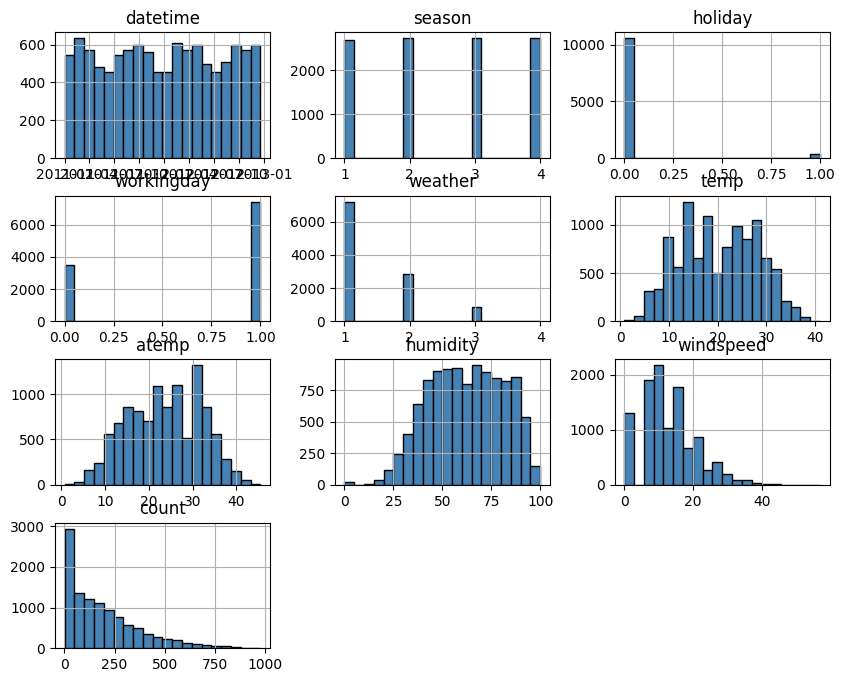

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(10, 8), bins=20, color='steelblue', edgecolor='black')


## Train 2

In [ ]:
# create a new feature
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
categorical_columns = ["season", "holiday", "workingday", "weather"]
train[categorical_columns] = train[categorical_columns].astype("category")
test[categorical_columns] = test[categorical_columns].astype("category")

In [ ]:
from sklearn.model_selection import train_test_split
train_data,val_data = train_test_split(train,test_size=0.2,random_state=0)  

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>]], dtype=object)

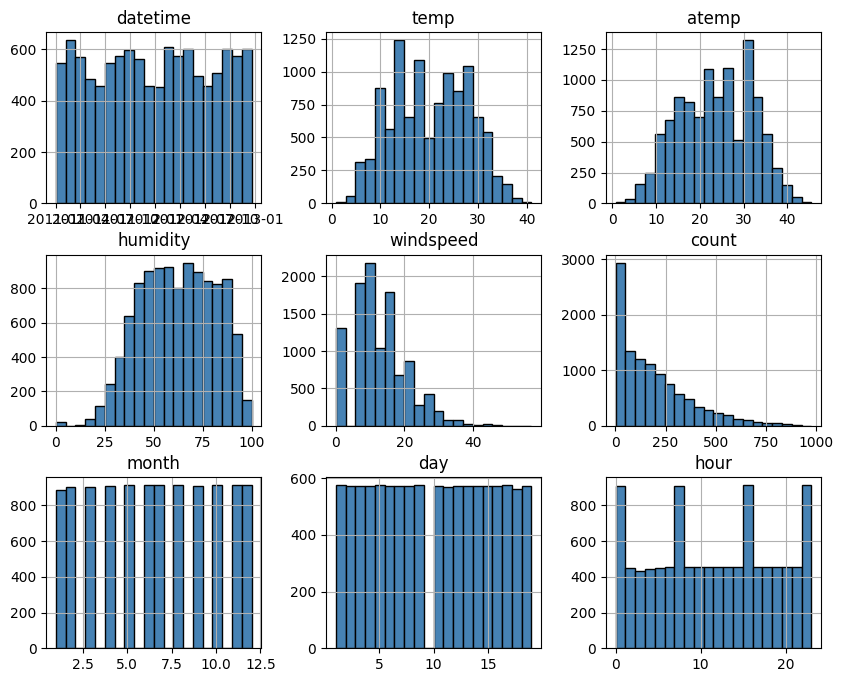

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(10, 8), bins=20, color='steelblue', edgecolor='black')

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label ='count',eval_metric='root_mean_squared_error').fit(train_data, presets="best_quality", time_limit = 600)

No path specified. Models will be saved in: "AutogluonModels/ag-20230530_100204/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230530_100204/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    8708
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 190.85554, 180.85226)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -32.189194      54.094064  555.842831                0.001114           0.296825            3       True         12
1     ExtraTreesMSE_BAG_L2  -32.637244      52.175281  397.996048                0.785659          17.902281            2       True         11
2          LightGBM_BAG_L2  -32.727671      51.840299  431.815845                0.450677          51.722077            2       True          9
3        LightGBMXT_BAG_L2  -32.826100      52.065276  439.738425                0.675654          59.644657            2       True          8
4   RandomForestMSE_BAG_L2  -32.903770      52.180960  426.276991                0.791338          46.183223            2       True         10
5      WeightedEnsemble_L2  -32.957927      51.266059  380.612438         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -112.76989371124893,
  'KNeighborsDist_BAG_L1': -94.48812854475563,
  'LightGBMXT_BAG_L1': -35.30868913372102,
  'LightGBM_BAG_L1': -34.46674034611682,
  'RandomForestMSE_BAG_L1': -40.04079906182037,
  'CatBoost_BAG_L1': -36.67230088487387,
  'WeightedEnsemble_L2': -32.95792703460077,
  'LightGBMXT_BAG_L2': 

In [ ]:
predictor_new_features.leaderboard(val_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-33.538716,-32.189194,55.716893,54.094064,555.842831,0.009313,0.001114,0.296825,3,True,12
1,LightGBMXT_BAG_L2,-33.624294,-32.826100,52.870091,52.065276,439.738425,0.968461,0.675654,59.644657,2,True,8
2,LightGBM_BAG_L2,-33.825862,-32.727671,52.267363,51.840299,431.815845,0.365733,0.450677,51.722077,2,True,9
3,RandomForestMSE_BAG_L2,-34.076701,-32.903770,53.104867,52.180960,426.276991,1.203236,0.791338,46.183223,2,True,10
4,ExtraTreesMSE_BAG_L2,-34.326397,-32.637244,53.170151,52.175281,397.996048,1.268521,0.785659,17.902281,2,True,11
5,WeightedEnsemble_L2,-34.530669,-32.957927,51.892056,51.266059,380.612438,0.011960,0.001252,0.587543,2,True,7
6,LightGBM_BAG_L1,-35.758322,-34.466740,4.411616,4.237624,73.853945,4.411616,4.237624,73.853945,1,True,4
7,LightGBMXT_BAG_L1,-36.261018,-35.308689,45.940735,44.823404,157.536695,45.940735,44.823404,157.536695,1,True,3
8,CatBoost_BAG_L1,-38.944413,-36.672301,0.174938,0.624396,118.528281,0.174938,0.624396,118.528281,1,True,6
9,RandomForestMSE_BAG_L1,-39.399421,-40.040799,1.333254,1.407012,30.049768,1.333254,1.407012,30.049768,1,True,5


In [ ]:
leaderboard_df = predictor_new_features.leaderboard(val_data, silent=True, extra_info=True,)

In [ ]:
leaderboard_df.to_csv("leaderboard.csv", index=False)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
prediction_new = predictor_new_features.predict(val_data.drop(["count"], axis=1))
r2 = r2_score(val_data["count"], prediction_new)
print("R2_score :",r2)

rmse = mean_squared_error(val_data["count"], prediction_new, squared=False)
print("RMSE :",rmse)

R2_score : 0.9661454683841698
RMSE : 33.5387157085863


In [ ]:
# Remember to set all negative values to zero
prediction_new = predictor_new_features.predict(test)

In [ ]:
prediction_new[prediction_new<0] = 0
prediction_new.describe()

count    6493.000000
mean      184.662643
std       166.434906
min         3.469606
25%        49.629089
50%       139.948685
75%       276.563171
max       864.748291
Name: count, dtype: float64

In [ ]:
# Same submitting predictions
submission_new_features = test[["datetime"]].copy()
submission_new_features["count"] = prediction_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 352kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                           status    publicScore  privateScore  
---------------------------  -------------------  ------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-30 10:19:35  new features                          complete  0.51110      0.51110       
submission.csv               2023-05-30 10:01:55  first raw submission                  error                                
submission_new_hpo_v2.csv    2023-05-30 07:24:57  new features with hyperparameters v2  complete  0.48172      0.48172       
submission_new_hpo_v2.csv    2023-05-30 07:06:15  new features with hyperparameters v2  complete  0.54678      0.54678       


#### New Score of `0.606` 

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
import autogluon.core as ag

from autogluon.core.space import Real, Int, Categorical

# hyperparameter search space
rf_options = { 'n_estimators': Int(lower=10, upper=2000),
   'max_depth': Int(lower=1, upper=100),
   'max_features': Int(lower=1, upper=20),
   'min_samples_split': Int(lower=2, upper=10),
   'min_samples_leaf': Int(lower=1, upper=20),
   'min_impurity_decrease': Real(0.0, 1.0)
}


lgbm_options = {
    'learning_rate': Real(0.01, 0.1),
    'num_leaves': Int(lower=10, upper=100),
    'max_depth': Int(lower=1, upper=15),
    'subsample': Real(0.8, 1.0),
    'colsample_bytree': Real(0.8, 1.0),
    'reg_alpha': Real(0.0, 0.5),
    'reg_lambda': Real(0.0, 0.5),
    'min_child_samples': Int(lower=10, upper=30),
    'min_child_weight': Real(0.001, 0.1)
}

xgb_options =  {
        'n_estimators': Int(lower=50, upper=200),
        'max_depth': Int(lower=3, upper=10),
        'learning_rate': Real(0.01, 0.1),
        'subsample': Real(0.6, 0.9),
        'colsample_bylevel': Real(0.6, 0.9),
        'colsample_bytree': Real(0.6, 0.9),
        'reg_alpha': Real(0.0, 1.0),
        'reg_lambda': Real(0.0, 1.0),
        'min_child_weight': Real(0.1, 10.0),
    }
rf_options = {'n_estimators': 1393, 'max_leaf_nodes': 15000, 'n_jobs': -1, 'random_state': 0, 'bootstrap': True, 'max_depth': 45, 'max_features': 16, 'min_samples_split': 5, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.7151893663724195}
xgbv1 = {'n_estimators': 71, 'learning_rate': 0.06424870384644796, 'n_jobs': -1, 'proc.max_category_levels': 100, 'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 6, 'subsample': 0.6170138931952329, 'colsample_bylevel': 0.7646440511781974, 'colsample_bytree': 0.8145568099117259, 'reg_alpha': 0.3843817072926998, 'reg_lambda': 0.2975346065444723, 'min_child_weight': 8.487792213962841}
xgbv2 = {'n_estimators': 185, 'learning_rate': 0.060203017079458465, 'n_jobs': -1, 'proc.max_category_levels': 100, 'objective': 'reg:squarederror', 'booster': 'gbtree', 'max_depth': 8, 'subsample': 0.8977288569856967, 'colsample_bylevel': 0.7510282283819858, 'colsample_bytree': 0.8861164141991495, 'reg_alpha': 0.86302261666035, 'reg_lambda': 0.1576322757366576, 'min_child_weight': 9.523557320644088}


hyperparameters = {  # hyperparameters of each model type
                   'RF': rf_options,
                   'GBM': lgbm_options,
                   'XGB': xgb_options
                 }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 60  # train various models for ~30s
num_trials = 8  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label ='count',eval_metric='root_mean_squared_error').fit(
    train_data, presets="best_quality", time_limit = 600, #auto_stack=False,
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230530_101937/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230530_101937/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    8708
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 190.85554, 180.85226)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

  0%|          | 0/8 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-99.9299	 = Validation score   (-root_mean_squared_error)
	140.81s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForest_BAG_L1 ... Tuning model for up to 119.89s of the 458.6s of remaining time.
	No hyperparameter search space specified for RandomForest_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForest_BAG_L1 ...
	-41.3172	 = Validation score   (-root_mean_squared_error)
	57.98s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 119.89s of the 400.54s of remaining time.


  0%|          | 0/8 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-191.7387	 = Validation score   (-root_mean_squared_error)
	39.66s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T2 ...
	-48.2754	 = Validation score   (-root_mean_squared_error)
	37.46s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T3 ...
	-41.2001	 = Validation score   (-root_mean_squared_error)
	50.02s	 = Training   runtime
	0.0s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 273.17s of remaining time.
	-38.3361	 = Validation score   (-root_mean_squared_error)
	0.34s	 = Training   runtime
	0.0s	 =

  0%|          | 0/8 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-37.3854	 = Validation score   (-root_mean_squared_error)
	120.63s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForest_BAG_L2 ... Tuning model for up to 81.84s of the 152.0s of remaining time.
	No hyperparameter search space specified for RandomForest_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForest_BAG_L2 ...
	-36.5182	 = Validation score   (-root_mean_squared_error)
	76.92s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 81.84s of the 75.01s of remaining time.


  0%|          | 0/8 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-164.7985	 = Validation score   (-root_mean_squared_error)
	43.28s	 = Training   runtime
	0.0s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 31.54s of remaining time.
	-36.4555	 = Validation score   (-root_mean_squared_error)
	0.48s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 568.99s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230530_101937/")


In [ ]:
leaderboard_df = predictor_new_hpo.leaderboard(val_data, silent=True, extra_info=True)
leaderboard_df.to_csv("leaderboard.csv", index=False)
leaderboard_df

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-36.820631,-36.455450,37.323164,0.003646,523.946513,0.005167,0.001508,0.476124,3,...,"{'use_orig_features': False, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[LightGBM_BAG_L2/T1, RandomForest_BAG_L2]",None,{'ensemble_size': 100},{'ensemble_size': 34},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[LightGBM_BAG_L2/T1, LightGBM_BAG_L1/T1, RandomForest_BAG_L2, XGBoost_BAG_L1/T2, XGBoost_BAG_L1/T3, RandomForest_BAG_L1, XGBoost_BAG_L1/T1]",[]
1,RandomForest_BAG_L2,-37.014645,-36.518226,23.671458,0.001902,402.843580,0.700751,0.000481,76.915893,2,...,"{'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True, 'use_child_oof': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[datetime.month, XGBoost_BAG_L1/T3, workingday, humidity, windspeed, datetime, LightGBM_BAG_L1/T1, weather, datetime.day, hour, month, atemp, XGBoost_BAG_L1/T2, datetime.dayofweek, XGBoost_BAG_L1/T1, temp, day, holiday, datetime.year, RandomForest_BAG_L1, season]",None,"{'n_estimators': 1393, 'max_leaf_nodes': 15000, 'n_jobs': -1, 'random_state': 0, 'bootstrap': True, 'max_depth': 45, 'max_features': 16, 'min_samples_split': 5, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.7151893663724195}",{'n_estimators': 1393},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': ['bool', 'int', 'float', 'category'], 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None}","[LightGBM_BAG_L1/T1, XGBoost_BAG_L1/T2, XGBoost_BAG_L1/T3, RandomForest_BAG_L1, XGBoost_BAG_L1/T1]",[WeightedEnsemble_L3]
2,LightGBM_BAG_L2/T1,-37.022561,-37.385436,36.617247,0.001657,446.554496,13.646540,0.000236,120.626810,2,...,"{'use_orig_features': True, 'max_base_models': 25, 'max_base_models_per_type': 5, 'save_bag_folds': True}",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limit_ratio': 1.0, 'max_time_limit': None, 'min_time_limit': 0, 'valid_raw_types': None, 'valid_special_types': None, 'ignored_type_group_special': None, 'ignored_type_group_raw': None, 'get_features_kwargs': None, 'get_features_kwargs_extra': None, 'predict_1_batch_size': None, 'temperature_scalar': None, 'drop_unique': False}","[datetime.month, XGBoost_BAG_L1/T3, workingday, humidity, windspeed, datetime, LightGBM_BAG_L1/T1, weather, datetime.day, hour, month, atemp, XGBoost_BAG_L1/T2, datetime.dayofweek, XGBoost_BAG_L1/T1, temp, day, holiday, datetime.year, RandomFores

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3  -36.455450       0.003646  523.946513                0.001508           0.476124            3       True         10
1  RandomForest_BAG_L2  -36.518226       0.001902  402.843580                0.000481          76.915893            2       True          8
2   LightGBM_BAG_L2/T1  -37.385436       0.001657  446.554496                0.000236         120.626810            2       True          7
3  WeightedEnsemble_L2  -38.336071       0.004204  108.339864                0.003522           0.338255            2       True          6
4    XGBoost_BAG_L1/T3  -41.200079       0.000206   50.018770                0.000206          50.018770            1       True          5
5  RandomForest_BAG_L1  -41.317179       0.000476   57.982839                0.000476          57.

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T3': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -99.92993687084676,
  'RandomForest_BAG_L1': -41.317178622429566,
  'XGBoost_BAG_L1/T1': -191.738725280903,
  'XGBoost_BAG_L1/T2': -48.2754335679763,
  'XGBoost_BAG_L1/T3': -41.20007933209465,
  'WeightedEnsemble_L2': -38.33607104306681,
  'LightGBM_BAG_L2/T1': -37.38543608944819,
  'RandomForest_BAG_L2': -36.518225933920384,
  'XGBoost_BAG_L2/T1': -164.79848337306987,
  'WeightedEnsemble_L3': -36.4554501443

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
prediction_new = predictor_new_hpo.predict(val_data.drop(["count"], axis=1))
r2 = r2_score(val_data["count"], prediction_new)
print("R2_score :",r2)

rmse = mean_squared_error(val_data["count"], prediction_new, squared=False)
print("RMSE :",rmse)

R2_score : 0.9591956557234937
RMSE : 36.82063084824907


In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -75.749181      18.228514  545.898029                0.000959           0.220630            3       True         12
1          LightGBM_BAG_L2  -75.839626      15.031733  463.277328                0.249126          55.058908            2       True         11
2        LightGBMXT_BAG_L2  -79.979880      17.978428  490.618490                3.195822          82.400070            2       True         10
3    KNeighborsDist_BAG_L1  -94.488129       0.053843    0.024659                0.053843           0.024659            1       True          2
4      WeightedEnsemble_L2  -94.488129       0.055413    0.549316                0.001570           0.524657            2       True          9
5    KNeighborsUnif_BAG_L1 -112.769894       0.051637    0.022691         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -112.76989371124893,
  'KNeighborsDist_BAG_L1': -94.48812854475563,
  'LightGBMXT_BAG_L1': -133.13111209691883,
  'LightGBM_BAG_L1': -133.27724768144387,
  'RandomForestMSE_BAG_L1': -120.80128998719539,
  'CatBoost_BAG_L1': -133.06090463904943,
  'ExtraTreesMSE_BAG_L1': -127.10116127477657,
  'N

In [ ]:
# Remember to set all negative values to zero
prediction_new_hpo = predictor_new_hpo.predict(test)
prediction_new_hpo[prediction_new_hpo<0] = 0
prediction_new_hpo.describe() 

count    6493.000000
mean      193.401703
std       174.883575
min         3.631966
25%        45.968281
50%       152.818451
75%       282.617676
max       908.408203
Name: count, dtype: float64

In [ ]:
# Same submitting predictions
submission_new_hpo = test[["datetime"]].copy()
submission_new_hpo["count"] = prediction_new_hpo
submission_new_hpo.to_csv("submission_new_hpo_v2.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_v2.csv -m "new features with hyperparameters v2"

100% 188k/188k [00:00<00:00, 490kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                           status    publicScore  privateScore  
---------------------------  -------------------  ------------------------------------  --------  -----------  ------------  
submission_new_hpo_v2.csv    2023-05-30 10:32:45  new features with hyperparameters v2  complete  0.47359      0.47359       
submission_new_features.csv  2023-05-30 10:19:35  new features                          complete  0.51110      0.51110       
submission.csv               2023-05-30 10:01:55  first raw submission                  error                                
submission_new_hpo_v2.csv    2023-05-30 07:24:57  new features with hyperparameters v2  complete  0.48172      0.48172       


#### New Score of `0.47359`

hyper parameter links https://www.perplexity.ai/search/b5a2e5f1-08a5-49a7-ad49-59262cf82052?s=c

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

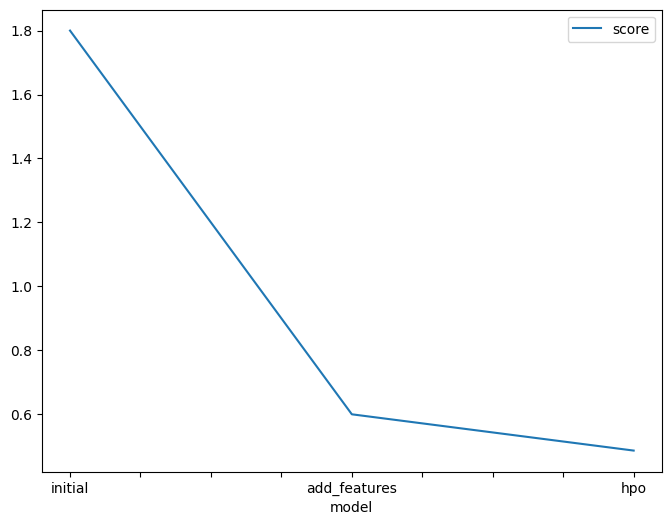

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.8, 0.60, 0.48655]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

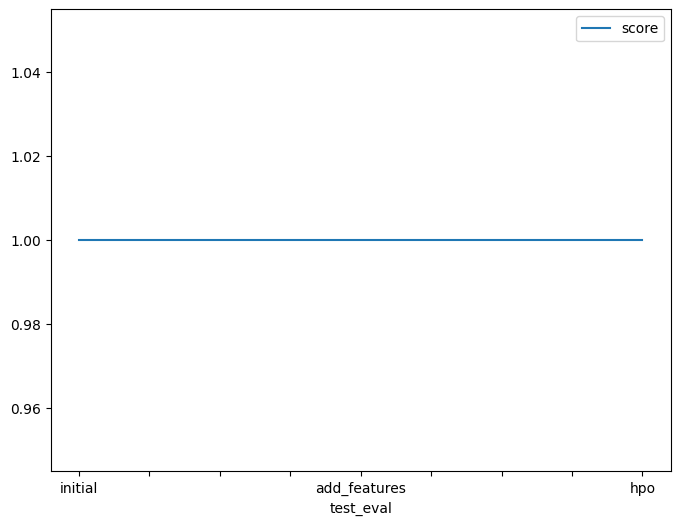

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1,1,1]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
import numpy as np
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [np.nan, np.nan, [{"rf_options": { 'n_estimators': Int(lower=10, upper=2000),
   'max_depth': Int(lower=1, upper=100),
   'max_features': Int(lower=1, upper=20),
   'min_samples_split': Int(lower=2, upper=10),
   'min_samples_leaf': Int(lower=1, upper=20),
   'min_impurity_decrease': Real(0.0, 1.0)
}}]],
    "hpo2": [np.nan,np.nan, [{"lgbm_options" : {
    'learning_rate': Real(0.01, 0.1),
    'num_leaves': Int(lower=10, upper=100),
    'max_depth': Int(lower=1, upper=15),
    'subsample': Real(0.8, 1.0),
    'colsample_bytree': Real(0.8, 1.0),
    'reg_alpha': Real(0.0, 0.5),
    'reg_lambda': Real(0.0, 0.5),
    'min_child_samples': Int(lower=10, upper=30),
    'min_child_weight': Real(0.001, 0.1)
}}]],
    "hpo3": [np.nan,np.nan,[{"xgb_options":  {
        'n_estimators': Int(lower=50, upper=200),
        'max_depth': Int(lower=3, upper=10),
        'learning_rate': Real(0.01, 0.1),
        'subsample': Real(0.6, 0.9),
        'colsample_bylevel': Real(0.6, 0.9),
        'colsample_bytree': Real(0.6, 0.9),
        'reg_alpha': Real(0.0, 1.0),
        'reg_lambda': Real(0.0, 1.0),
        'min_child_weight': Real(0.1, 10.0),
    }}]],
    "score": [1,1,1]
})







,model,hpo1,hpo2,hpo3,score
0,initial,NaN,NaN,NaN,1
1,add_features,NaN,NaN,NaN,1
2,hpo,"[{'rf_options': {'n_estimators': Int: lower=10, upper=2000, 'max_depth': Int: lower=1, upper=100, 'max_features': Int: lower=1, upper=20, 'min_samples_split': Int: lower=2, upper=10, 'min_samples_leaf': Int: lower=1, upper=20, 'min_impurity_decrease': Real: lower=0.0, upper=1.0}}]","[{'lgbm_options': {'learning_rate': Real: lower=0.01, upper=0.1, 'num_leaves': Int: lower=10, upper=100, 'max_depth': Int: lower=1, upper=15, 'subsample': Real: lower=0.8, upper=1.0, 'colsample_bytree': Real: lower=0.8, upper=1.0, 'reg_alpha': Real: lower=0.0, upper=0.5, 'reg_lambda': Real: lower=0.0, upper=0.5, 'min_child_samples': Int: lower=10, upper=30, 'min_child_weight': Real: lower=0.001, upper=0.1}}]","[{'xgb_options': {'n_estimators': Int: lower=50, upper=200, 'max_depth': Int: lower=3, upper=10, 'learning_rate': Real: lower=0.01, upper=0.1, 'subsample': Real: lower=0.6, upper=0.9, 'colsample_bylevel': Real: lower=0.6, upper=0.9, 'colsample_bytree': Real: lower=0.6, upper=0.9, 'reg_alpha': Real: lower=0.0, upper=1.0, 'reg_lambda': Real: lower=0.0, upper=1.0, 'min_child_weight': Real: lower=0.1, upper=10.0}}]",1


# Report: Predict Bike Sharing Demand with AutoGluon Solution
#### ANAND SIVA P V

## Initial Training
### 1. What did you realize when you tried to submit your predictions? What changes were needed to the output of the predictor to submit your results?

- The output of the predictor had -ve values which was not accepted by Kaggle and needed to be changed to 0.
- The first column of the test results need to be the corresponding date value.

### 2. What was the top ranked model that performed?
TODO: 
- WeightedEnsemble_L3 was the top ranked model having an RMSE of -76.27 and R2 score of 0.8249

## 3. Exploratory data analysis and feature creation
### What did the exploratory analysis find and how did you add additional features?
TODO: 
- The dataset includes several numerical and categorical features. The categorical features are `datetime`,`season`, `holiday`, `working day` and `weather`.

- The numerical features are `temperature`, `feels like temperature (atemp)`, `humidity`,`windspeed`, and the idependent variable `count`.

- I have added three additional categorical features:`month`,`day`, and `hour`, derriving from the `datetime` column.

### 4. How much better did your model preform after adding additional features and why do you think that is?
TODO: 
- After adding the additional features, the model had decreased the RMSE to `-33.53` (`56.05%` less than initial model)
- The new R2 score was increased to `0.966` (`17.17%` more than initial model) 

## 5. Hyper parameter tuning
### How much better did your model perform after adding additional features and why do you think that is?

TODO: 
- The Best performing model after hyper parameter tuning was the `WeightedEnsemble_L3` which consists of {`LightGBM_BAG_L2/T1`, `LightGBM_BAG_L1/T1`, `RandomForest_BAG_L2`}
- had an RMSE of `-36.82`(`9.81%` higher than the 2nd model) and R2 score of `0.959`(`0.72%` lower than the 2nd model)

### 6. If you were given more time with this dataset, where do you think you would spend more time?
TODO: Experiment with different hyper parameters for the various models.

### 7. Create a table with the models you ran, the hyperparameters modified, and the kaggle score.
|model|hpo1|hpo2|hpo3|score|
|--|--|--|--|--|
|initial|?|?|?|?|
|add_features|?|?|?|?|
|hpo|?|?|?|?|

### 8. Create a line plot showing the top model score for the three (or more) training runs during the project.

TODO: Replace the image below with your own.

![model_train_score.png](img/model_train_score.png)

### 9. Create a line plot showing the top kaggle score for the three (or more) prediction submissions during the project.

TODO: Replace the image below with your own.

![model_test_score.png](img/model_test_score.png)

## 10. Summary
TODO: Add your explanation